In [288]:
import joblib
import numpy as np

#load neural network
neuralNetwork = joblib.load("nfp3/neuralNetwork.pkl")
X_scaler = joblib.load("nfp3/neuralNetworkX_scaler.pkl")
y_scaler = joblib.load("nfp3/neuralNetworky_scaler.pkl")
nfp=3 #0 for all nfp

In [289]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#data set used to train network
df = pd.read_csv("../scans/scan7/scan7Clean.csv.zip")

# select nfp
if (nfp != 0):
    df = df[df['nfp'] == nfp]
    y = df.loc[:, ['rc1', 'zs1', 'eta']]
else:
    y = df.loc[:, ['nfp', 'rc1', 'zs1', 'eta']]

X = df.loc[:, ['RotTrans', 'axLenght', 'max_elong']]


# Split training and testing sets
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.1, train_size=0.9,
                     random_state=0)

#scale
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

/home/exxxx5/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


The Result was:
nfp=3, rc1=0.26062911146936096, zs1=-0.28866552326560196, etabar=-1.4847645417112294

Predicted iota: 1.4328245953495289
Asked iota:     1.5

Predicted axis_length: 1.301739768918192
Asked axis_length:     1.3

Predicted max_elongation: 5.622687068704783
Asked max_elongation:     6


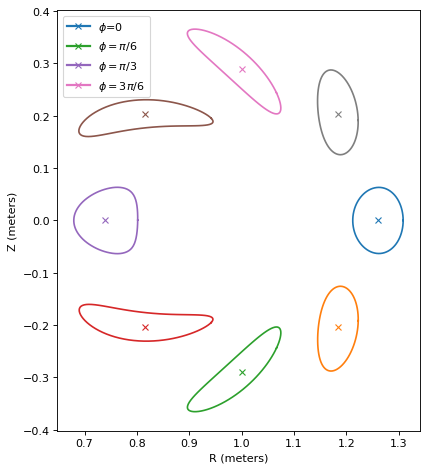

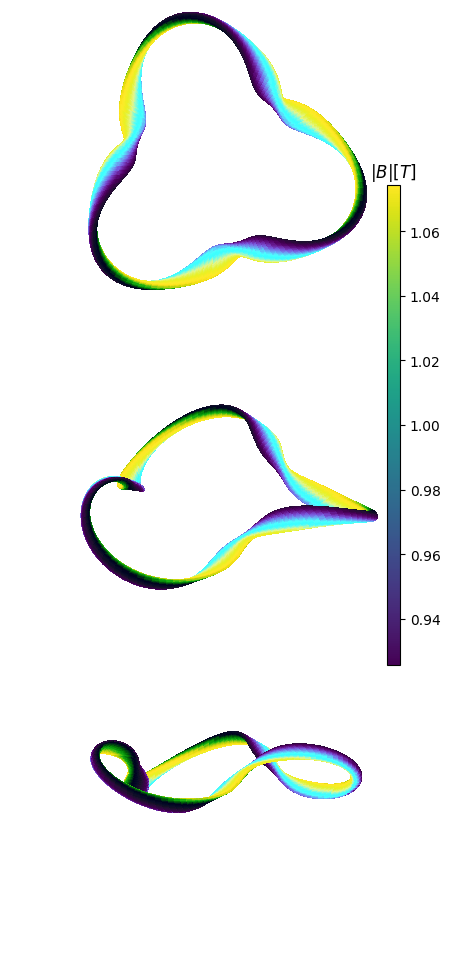

In [290]:
from qsc import Qsc
import numpy as np
#testData -> iota, axis_Length, max_elongation
testData = [[1.5, 1.3, 6]]
testData_scaled = X_scaler.transform(testData)
#predict
predicted = neuralNetwork.predict(testData_scaled)
if nfp == 0:
    nfp, rc1, zs1, etabar = y_scaler.inverse_transform(predicted)[0]
    nfp = int(np.round(nfp))
else:
    rc1, zs1, etabar = y_scaler.inverse_transform(predicted)[0]

print(f"The Result was:\nnfp={nfp}, rc1={rc1}, zs1={zs1}, etabar={etabar}\n")

stel = Qsc(rc=[1,rc1],zs=[0,zs1],nfp=nfp,etabar=etabar)
print('Predicted iota:', stel.iota)
print('Asked iota:    ', testData[0][0])
print('')
print('Predicted axis_length:', stel.axis_length / 2. / np.pi)
print('Asked axis_length:    ', testData[0][1])
print('')
print('Predicted max_elongation:', stel.max_elongation)
print('Asked max_elongation:    ', testData[0][2])
stel.plot_boundary(r=0.05)

test stats:
r2:  0.9733515824985973
mse:  0.026762000980650725

training stats:
loss:  0.013526300054885206
validationScore:  0.974073003545381


Text(0, 0.5, 'Actual')

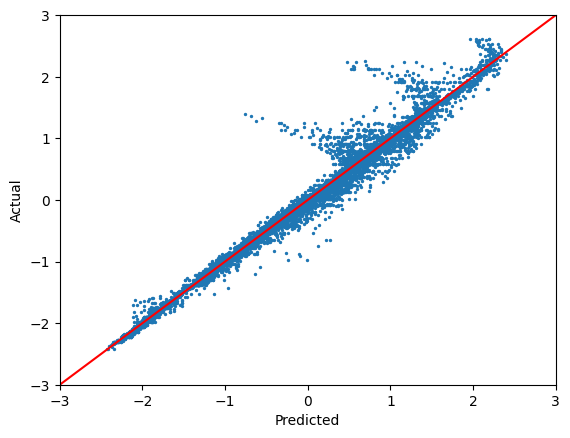

In [291]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
Y_NN = neuralNetwork.predict(X_test_scaled)
print("test stats:")
print("r2: ", r2_score(y_test_scaled, Y_NN))
print("mse: ", mean_squared_error(y_test_scaled, Y_NN))
print("\ntraining stats:")
print("loss: ", neuralNetwork.loss_)
print("validationScore: ", neuralNetwork.best_validation_score_)
plt.scatter(np.ravel(Y_NN),np.ravel(y_test_scaled),s=2)
plt.axline([0, 0], [1, 1], color='red')
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.xlabel('Predicted')
plt.ylabel('Actual')

[-0.31580584  0.76485178  1.05670954 ...  0.15433564  0.42502066
  0.13517136]
[[-0.31654501  0.06275354  0.35529518]
 [ 0.71565871 -0.29877029 -0.86414641]
 [ 1.01326018 -1.0699523  -1.65248757]
 ...
 [ 0.16024467 -0.1074399  -0.86649535]
 [ 0.37067401  0.18568701 -1.13167519]
 [ 0.16024467 -0.19253662 -0.20006415]]
test stats:
r2:  0.9733515824985973
mse:  0.026762000980650725

training stats:
loss:  0.013526300054885206
validationScore:  0.974073003545381


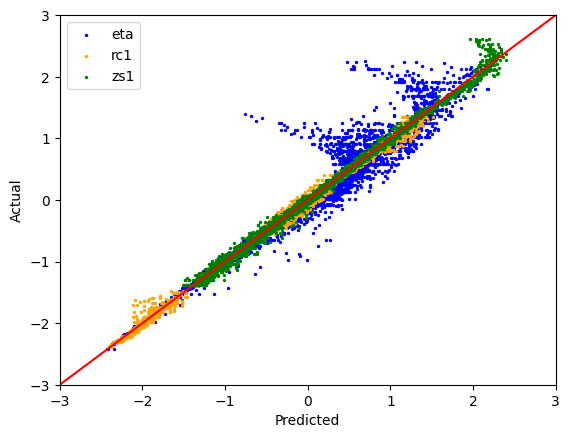

In [292]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
Y_NN = neuralNetwork.predict(X_test_scaled)
print(Y_NN[:,0])
print(y_test_scaled)
print("test stats:")
print("r2: ", r2_score(y_test_scaled, Y_NN))
print("mse: ", mean_squared_error(y_test_scaled, Y_NN))
print("\ntraining stats:")
print("loss: ", neuralNetwork.loss_)
print("validationScore: ", neuralNetwork.best_validation_score_)

fig, ax = plt.subplots()

ax.scatter(Y_NN[:,2],y_test_scaled[:,2], c="blue", label="eta",s=2)
ax.scatter(Y_NN[:,0],y_test_scaled[:,0], c="orange", label="rc1", s=2)
ax.scatter(Y_NN[:,1],y_test_scaled[:,1], c="green", label="zs1", s=2)

plt.axline([0, 0], [1, 1], color='red')
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.xlabel('Predicted')
plt.ylabel('Actual')
ax.legend()

In [293]:
#real error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
Y_NN = neuralNetwork.predict(X_test_scaled)
Y_NN_unscaled = y_scaler.inverse_transform(Y_NN)

out = {
    #"askedRotTrans" : [],
    #"askedAxLength" : [],
    #"askedMaxElong" : [],
    "RotTrans" : [],
    "axLenght" : [],
    "max_elong" : [],
}
OutlierList = []
for i in range(len(Y_NN_unscaled)):
    rc1=Y_NN_unscaled[i][0]
    zs1=Y_NN_unscaled[i][1]
    eta=Y_NN_unscaled[i][2]
    stel = Qsc(rc=[1,rc1],zs=[0,zs1],nfp=nfp,etabar=eta)
    #out["askedRotTrans"].append(X_test.loc[index,"RotTrans"])
    #out["askedAxLength"].append(X_test.loc[index,"axLenght"])
    #out["askedMaxElong"].append(X_test.loc[index,"max_elong"])
    out["RotTrans"].append(stel.iota)
    out["axLenght"].append(stel.axis_length / 2. / np.pi)
    out["max_elong"].append(stel.max_elongation)
    if stel.max_elongation > 15:
        print(i, " max elongation >15")
        OutlierList.append(i)

predictedX=pd.DataFrame(out)
print(df)

2515  max elongation >15
2742  max elongation >15
        axLenght  RotTrans  nfp   heli       rc1       zs1       eta  \
7023    1.039983  0.202394    3  False  0.012245 -0.134694 -0.864286   
7024    1.039983  0.203886    3  False  0.012245 -0.134694 -0.803265   
7025    1.039983  0.200779    3  False  0.012245 -0.134694 -0.742245   
7026    1.043558  0.205021    3  False  0.012245 -0.140816 -0.864286   
7027    1.043558  0.207371    3  False  0.012245 -0.140816 -0.803265   
...          ...       ...  ...    ...       ...       ...       ...   
196561  1.269033  1.368953    3   True  0.213627 -0.297710 -1.515974   
196566  1.132677  1.438993    3   True  0.188479 -0.162969 -1.909999   
196568  1.157310  1.115720    3   True  0.157538 -0.223832 -1.300393   
196570  1.312247  1.506512    3   True  0.296063 -0.262473 -1.324685   
196576  1.295229  2.220743    3   True  0.287696 -0.253549 -2.936351   

        max_elong    LgradB    min_R0  
7023     7.863422  0.315236  0.987755  
7024 

non normalized
test stats:
r2:  0.9259197668179736
mse:  0.20675420462304087
mse Rotational Transform:  0.001726038350078494
mse Axis Length:  1.3359804058024311e-06
mse Max Elongation:  0.6185352395386383
normalized:
test stats:
r2:  0.9259197668179736
mse:  0.0723097547343034
mse Rotational Transform:  0.007587616698084167
mse Axis Length:  0.00014864880118364534
mse Max Elongation:  0.20919299870364239


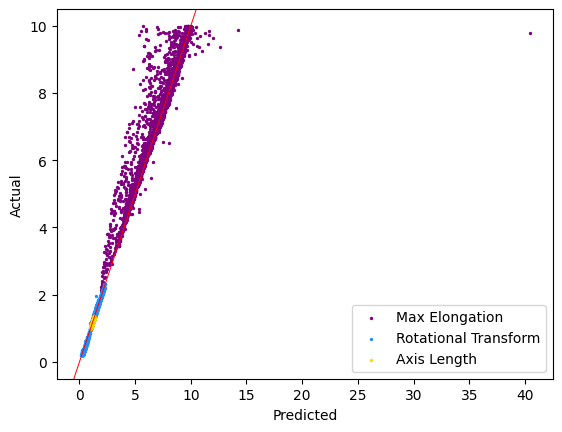

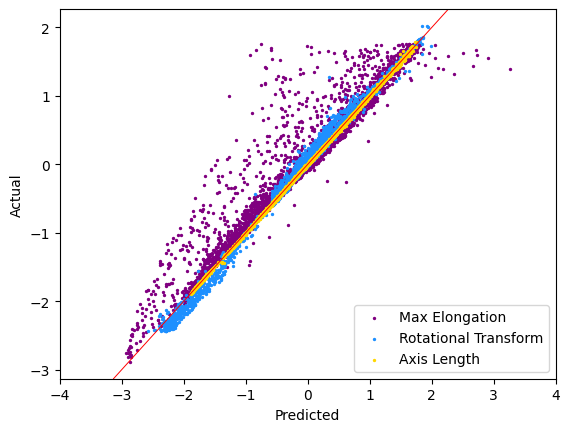

In [21]:
#plot real error
print("non normalized")
print("test stats:")
print("r2: ", r2_score(X_test, predictedX))
print("mse: ", mean_squared_error(X_test, predictedX))
print("mse Rotational Transform: ", mean_squared_error(X_test["RotTrans"], predictedX["RotTrans"]))
print("mse Axis Length: ", mean_squared_error(X_test["axLenght"], predictedX["axLenght"]))
print("mse Max Elongation: ", mean_squared_error(X_test["max_elong"], predictedX["max_elong"]))

fig, ax = plt.subplots()

ax.scatter(predictedX["max_elong"],X_test["max_elong"], c="purple", label="Max Elongation", s=2)
ax.scatter(predictedX["RotTrans"],X_test["RotTrans"], c="dodgerblue", label="Rotational Transform",s=2)
ax.scatter(predictedX["axLenght"],X_test["axLenght"], c="gold", label="Axis Length", s=2)

plt.axline([0, 0], [1, 1], color='red', lw=0.7)
#plt.ylim(-3, 3)
#plt.xlim(0, 15)
plt.xlabel('Predicted')
plt.ylabel('Actual')
ax.legend()

print("normalized:")
predictedX_scaled = X_scaler.transform(predictedX)
print("test stats:")
print("r2: ", r2_score(X_test_scaled, predictedX_scaled))
print("mse: ", mean_squared_error(X_test_scaled, predictedX_scaled))
print("mse Rotational Transform: ", mean_squared_error(X_test_scaled[:,0], predictedX_scaled[:,0]))
print("mse Axis Length: ", mean_squared_error(X_test_scaled[:,1], predictedX_scaled[:,1]))
print("mse Max Elongation: ", mean_squared_error(X_test_scaled[:,2], predictedX_scaled[:,2]))


fig, ax = plt.subplots()
ax.scatter(predictedX_scaled[:,2],X_test_scaled[:,2], c="purple", label="Max Elongation", s=2)
ax.scatter(predictedX_scaled[:,0],X_test_scaled[:,0], c="dodgerblue", label="Rotational Transform",s=2)
ax.scatter(predictedX_scaled[:,1],X_test_scaled[:,1], c="gold", label="Axis Length", s=2)

plt.axline([0, 0], [1, 1], color='red', lw=0.7)
#plt.ylim(-3, 3)
plt.xlim(-4, 4)
plt.xlabel('Predicted')
plt.ylabel('Actual')
ax.legend()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

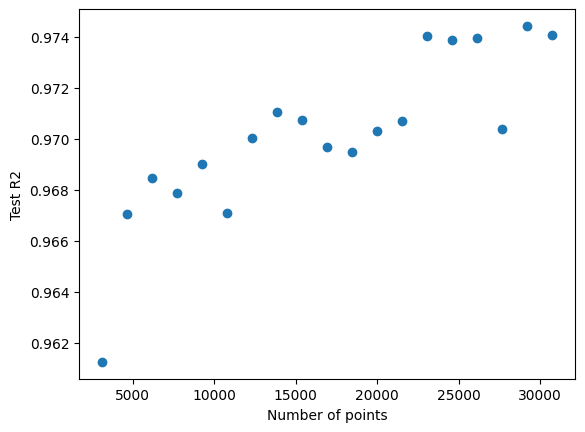

In [295]:
#Plot cardinality
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("nfp3Default/lossCardinality.csv")
plt.scatter(df["numberPoints"],df["testR2"])
plt.xlabel('Number of points')
plt.ylabel('Test R2')
plt.plot


In [296]:
#plot real error no outlier
print("outliers index:", OutlierList)
print("non normalized without outliers")
X_testNoOutlier = X_test.copy()
X_testNoOutlier.reset_index(inplace=True)
predictedXNoOutlier = predictedX.drop(OutlierList)
X_testNoOutlier = X_testNoOutlier.drop(OutlierList)
print("mse Max Elongation: ", mean_squared_error(X_testNoOutlier["max_elong"], predictedXNoOutlier["max_elong"]))


print("normalized without outliers:")
X_test_scaledNoOutlier = X_test_scaled
predictedX_scaledNoOutlier = X_scaler.transform(predictedXNoOutlier)
X_test_scaledNoOutlier = X_test_scaled
X_test_scaledNoOutlier=np.delete(X_test_scaledNoOutlier,OutlierList,axis=0)
print("mse Max Elongation: ", mean_squared_error(X_test_scaledNoOutlier[:,2], predictedX_scaledNoOutlier[:,2]))


outliers index: [2515, 2742]
non normalized without outliers
mse Max Elongation:  0.3434651825245281
normalized without outliers:
mse Max Elongation:  0.11616235727521809
